# Regressão Logística
***

## Importando bibliotecas

In [79]:
pip install ucimlrepo

In [80]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [81]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets


dataset = pd.concat([X,y], axis=1)
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [82]:
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Separando o conjunto de dados**

In [84]:
#Vamos usar somente duas features Petal Length e Petal Width
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Definindo semente
seed = 99

#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
y = pd.factorize(dataset['class'])[0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((105, 2), (45, 2))

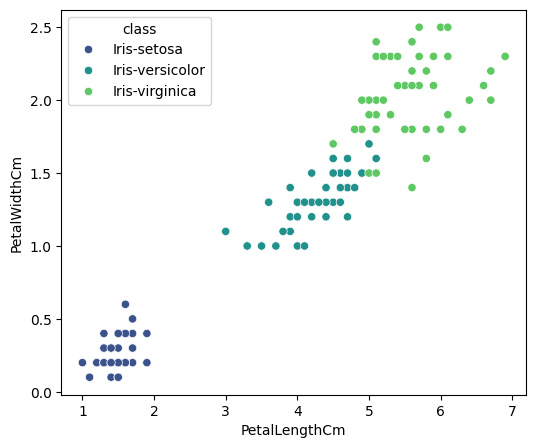

In [85]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dataset.iloc[:, 4].squeeze(), palette='viridis')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

## Treinamento do modelo

In [86]:
model = LogisticRegression(random_state=seed)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]

 Labels:[0 1 2] 



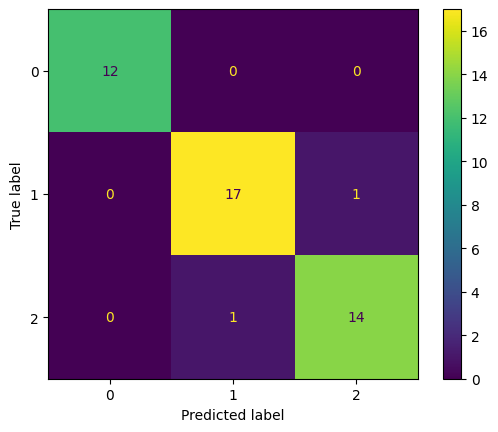

In [87]:
# a função confusion matrix retorna uma matriz com a contagem de como cada
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp_cm.plot()

### Região de decisão

In [88]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y, model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

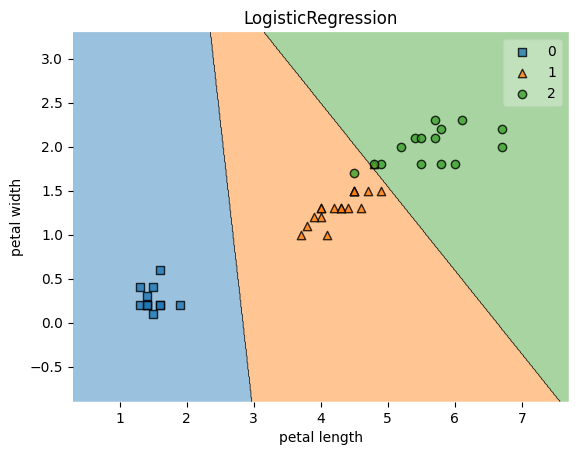

In [89]:
show_decision_region(X_test, y_test, model)

## E se ajustarmos os parâmetros

In [54]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=seed) #default params: { 'solver': lbfgs, penalty: 'l2', max_iter: 100}

param_grid = {
     #algoritmos usados para otimizar a função de custo
    'solver': ['lbfgs', 'liblinear', 'saga'],

     #tipo de regularização: L1: Penaliza a soma dos valores absolutos | L2: Penaliza a soma dos quadrados
    'penalty': ['l1','l2', None],

    #Numero máximo de iterações até a convergência
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score:  0.9714285714285715
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Agora vamos utilizar o modelo treinando apenas com as features das sépalas

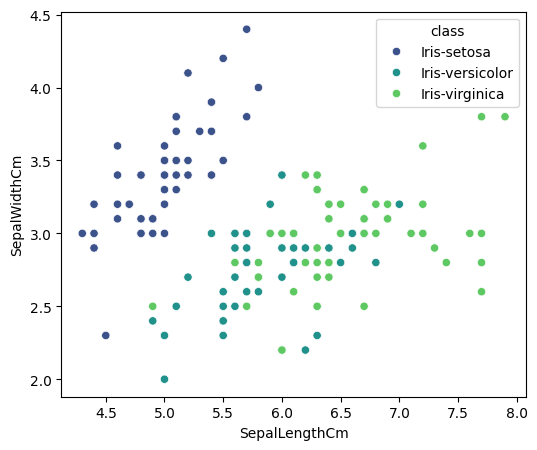

In [90]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

#Gráfico distribuição sépalas
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dataset.iloc[:, 4].squeeze(), palette='viridis')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
y = pd.factorize(dataset['class'])[0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [92]:
model = LogisticRegression(random_state=seed)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.92      0.61      0.73        18
           2       0.70      0.93      0.80        15

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.83        45
weighted avg       0.85      0.82      0.82        45



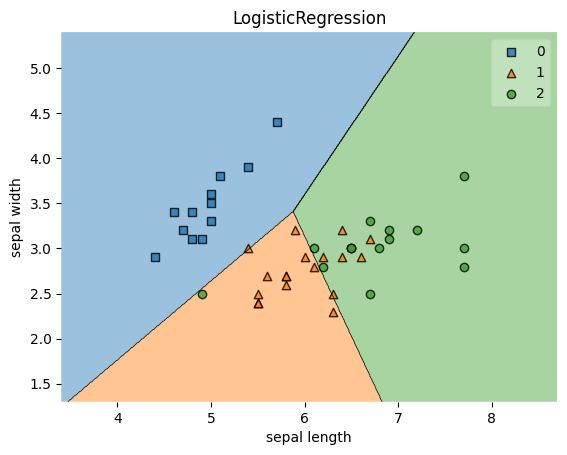

In [93]:
show_decision_region(X_test, y_test, model)

In [94]:
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l1','l2', None],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score:  0.7809523809523811
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.89      0.44      0.59        18
           2       0.61      0.93      0.74        15

    accuracy                           0.76        45
   macro avg       0.81      0.79      0.76        45
weighted avg       0.80      0.76      0.74        45



## Outro Dataset (Heart)

In [35]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spectf_heart = fetch_ucirepo(id=96)

# data (as pandas dataframes)
X = spectf_heart.data.features
y = spectf_heart.data.targets

heart_dataset = pd.concat([X,y], axis=1)
heart_dataset

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,diagnosis
0,59,52,70,67,73,66,72,61,58,52,...,56,62,56,72,62,74,74,64,67,1
1,72,62,69,67,78,82,74,65,69,63,...,71,63,60,69,73,67,71,56,58,1
2,71,62,70,64,67,64,79,65,70,69,...,70,66,65,64,55,61,41,51,46,1
3,69,71,70,78,61,63,67,65,59,59,...,61,66,65,72,73,68,68,59,63,1
4,70,66,61,66,61,58,69,69,72,68,...,69,70,66,70,64,60,55,49,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,74,69,75,70,70,74,77,77,65,67,...,67,63,61,71,68,66,65,54,57,0
263,72,61,64,66,64,59,68,66,76,66,...,64,67,71,69,68,65,73,56,52,0
264,75,73,72,77,68,67,76,73,67,65,...,67,72,71,79,75,77,75,67,71,0
265,59,62,72,74,66,66,74,76,63,67,...,71,67,69,77,78,77,76,70,70,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((186, 44), (81, 44))

In [41]:
model = LogisticRegression(random_state=seed)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50        21
           1       0.82      0.90      0.86        60

    accuracy                           0.78        81
   macro avg       0.71      0.66      0.68        81
weighted avg       0.76      0.78      0.76        81



In [44]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=seed)

param_grid = {
    #algoritmos usados para otimizar a função de custo
    'solver': ['lbfgs', 'liblinear', 'saga'],

    # tipo de regularização:
    #L1: Penaliza a soma dos valores absolutos | L2: Penaliza a soma dos quadrados
    'penalty': ['l1','l2', None],
    'max_iter': [100, 200, 300],
    'C': [0.05, 0.7, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred))

Best parameters found:  {'C': 0.05, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score:  0.7904694167852063
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.74      1.00      0.85        60

    accuracy                           0.74        81
   macro avg       0.37      0.50      0.43        81
weighted avg       0.55      0.74      0.63        81



## Outro Dataset (CDC Diabetes)

In [71]:
from ucimlrepo import fetch_ucirepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

cdc_dataset = pd.concat([X,y], axis=1)
cdc_dataset

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [30]:
cdc_dataset.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [78]:
cdc_dataset['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0,218334
1,35346


In [72]:
#Split em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((177576, 21), (76104, 21))

In [74]:
model = LogisticRegression(random_state=seed)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     65544
           1       0.51      0.13      0.21     10560

    accuracy                           0.86     76104
   macro avg       0.69      0.55      0.57     76104
weighted avg       0.82      0.86      0.82     76104



In [33]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=seed)

param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l1','l2', None],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

# Predição com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Resultados do classificador
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 